In [94]:
import pandas as pd
import numpy as np
import geopandas
import shapely
from matplotlib import pyplot as plt

In [95]:
name_csv = "checkins_Connecticut.csv"

In [96]:
df = pd.read_csv("./checkins_separated/"+name_csv)

In [97]:
df

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,radius_meters,highlights_count,items_count,max_items_count,spot_categories,geometry,index_right,NAME
0,58735,114897,2011-04-01T23:50:59Z,114897,2009-11-20T12:19:51Z,-72.926495,41.297590,19,683,271,100,1,10,10,"[{'url': '/categories/95', 'name': 'Train Stat...",POINT (-72.9264950752 41.2975899032),10.0,Connecticut
1,58735,114897,2011-03-12T00:55:52Z,114897,2009-11-20T12:19:51Z,-72.926495,41.297590,19,683,271,100,1,10,10,"[{'url': '/categories/95', 'name': 'Train Stat...",POINT (-72.9264950752 41.2975899032),10.0,Connecticut
2,58735,114897,2011-02-20T22:38:08Z,114897,2009-11-20T12:19:51Z,-72.926495,41.297590,19,683,271,100,1,10,10,"[{'url': '/categories/95', 'name': 'Train Stat...",POINT (-72.9264950752 41.2975899032),10.0,Connecticut
3,58735,114897,2010-12-26T15:36:31Z,114897,2009-11-20T12:19:51Z,-72.926495,41.297590,19,683,271,100,1,10,10,"[{'url': '/categories/95', 'name': 'Train Stat...",POINT (-72.9264950752 41.2975899032),10.0,Connecticut
4,58735,114897,2010-12-22T20:57:33Z,114897,2009-11-20T12:19:51Z,-72.926495,41.297590,19,683,271,100,1,10,10,"[{'url': '/categories/95', 'name': 'Train Stat...",POINT (-72.9264950752 41.2975899032),10.0,Connecticut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111791,2636994,7455547,2011-06-18T22:08:38Z,7455547,2011-06-02T11:06:09Z,-73.032990,41.553313,0,5,1,75,0,0,10,"[{'url': '/categories/106', 'name': 'Grocery'}]",POINT (-73.032989502 41.553313208),10.0,Connecticut
111792,2636994,7455547,2011-06-14T17:49:37Z,7455547,2011-06-02T11:06:09Z,-73.032990,41.553313,0,5,1,75,0,0,10,"[{'url': '/categories/106', 'name': 'Grocery'}]",POINT (-73.032989502 41.553313208),10.0,Connecticut
111793,2636994,7455547,2011-06-06T15:20:40Z,7455547,2011-06-02T11:06:09Z,-73.032990,41.553313,0,5,1,75,0,0,10,"[{'url': '/categories/106', 'name': 'Grocery'}]",POINT (-73.032989502 41.553313208),10.0,Connecticut
111794,2636994,7455547,2011-06-02T12:30:54Z,7455547,2011-06-02T11:06:09Z,-73.032990,41.553313,0,5,1,75,0,0,10,"[{'url': '/categories/106', 'name': 'Grocery'}]",POINT (-73.032989502 41.553313208),10.0,Connecticut


In [98]:
df["time"] = pd.to_datetime(df["datetime"], format="%Y-%m-%dT%H:%M:%SZ")

In [99]:
df["hour"] = df["time"].dt.hour
df["minute"] = df["time"].dt.minute
df["weekday"] = df["time"].dt.weekday
df["timeslot"] = df.apply(lambda x: max(x["hour"]*2-1, 0) if x["minute"] < 30 else x["hour"]+1, axis=1)
df["day"] = df["time"].dt.day_of_year
df["year"] = df["time"].dt.year

In [100]:
df = df.drop_duplicates(subset=["userid", "timeslot", "day"], keep="last").reset_index(drop=True)

In [101]:
df["rank"] = df.groupby("userid")["day"].rank(method="dense", ascending=True)

In [102]:
df["userid"].unique()

array([  58735,    9426,   69067, ..., 2679706, 2236670,  234961])

In [103]:
df

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,...,index_right,NAME,time,hour,minute,weekday,timeslot,day,year,rank
0,58735,114897,2011-04-01T23:50:59Z,114897,2009-11-20T12:19:51Z,-72.926495,41.297590,19,683,271,...,10.0,Connecticut,2011-04-01 23:50:59,23,50,4,24,91,2011,10.0
1,58735,114897,2011-03-12T00:55:52Z,114897,2009-11-20T12:19:51Z,-72.926495,41.297590,19,683,271,...,10.0,Connecticut,2011-03-12 00:55:52,0,55,5,1,71,2011,9.0
2,58735,114897,2011-02-20T22:38:08Z,114897,2009-11-20T12:19:51Z,-72.926495,41.297590,19,683,271,...,10.0,Connecticut,2011-02-20 22:38:08,22,38,6,23,51,2011,8.0
3,58735,114897,2010-12-26T15:36:31Z,114897,2009-11-20T12:19:51Z,-72.926495,41.297590,19,683,271,...,10.0,Connecticut,2010-12-26 15:36:31,15,36,6,16,360,2010,37.0
4,58735,114897,2010-12-22T20:57:33Z,114897,2009-11-20T12:19:51Z,-72.926495,41.297590,19,683,271,...,10.0,Connecticut,2010-12-22 20:57:33,20,57,2,21,356,2010,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56715,2636994,7455547,2011-06-18T22:08:38Z,7455547,2011-06-02T11:06:09Z,-73.032990,41.553313,0,5,1,...,10.0,Connecticut,2011-06-18 22:08:38,22,8,5,43,169,2011,20.0
56716,2636994,7455547,2011-06-14T17:49:37Z,7455547,2011-06-02T11:06:09Z,-73.032990,41.553313,0,5,1,...,10.0,Connecticut,2011-06-14 17:49:37,17,49,1,18,165,2011,19.0
56717,2636994,7455547,2011-06-06T15:20:40Z,7455547,2011-06-02T11:06:09Z,-73.032990,41.553313,0,5,1,...,10.0,Connecticut,2011-06-06 15:20:40,15,20,0,29,157,2011,14.0
56718,2636994,7455547,2011-06-02T12:30:54Z,7455547,2011-06-02T11:06:09Z,-73.032990,41.553313,0,5,1,...,10.0,Connecticut,2011-06-02 12:30:54,12,30,3,13,153,2011,13.0


<Axes: ylabel='Frequency'>

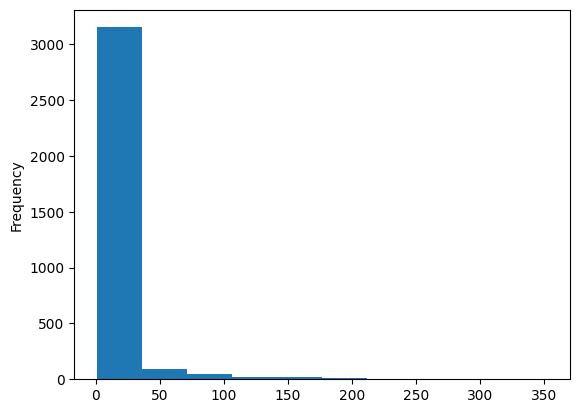

In [104]:
df.groupby("userid")["rank"].max().plot(kind="hist", bins=10)

In [105]:
df["userid"].nunique()

3355

In [106]:
# df_sorted = df. 
# rain = df[df["userid"].isin((df.groupby("userid")["rank"].max().sort_values(ascending=False).reset_index().query("rank >= 15").userid.tolist()))]
# percentil_20
train = df.copy()

In [107]:
gdf = geopandas.GeoDataFrame(train, geometry=geopandas.points_from_xy(x=train.lng, y=train.lat))

<Axes: >

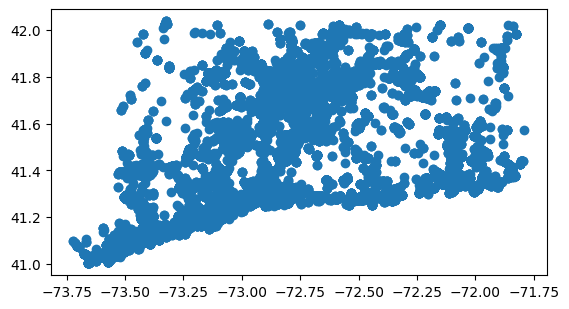

In [108]:
gdf.plot()

In [109]:
xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down
n_cells=199
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for n1, x0 in enumerate(np.arange(xmin, xmax+cell_size, cell_size)):
    for n2, y0 in enumerate(np.arange(ymin, ymax+cell_size, cell_size)):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append([shapely.geometry.box(x0, y0, x1, y1), n1, n2])
cell = geopandas.GeoDataFrame(grid_cells, columns=['geometry', 'x', 'y'])

In [110]:
cell["id"] = range(len(cell))

(-73.8183464628, -71.6955031732, 40.950976034515, 42.089271049184994)

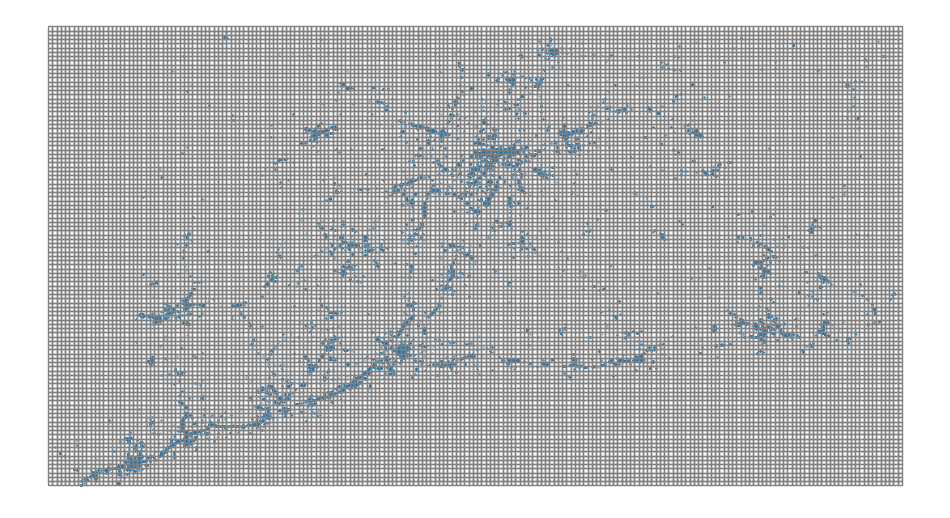

In [111]:
ax = gdf.plot(markersize=.1, figsize=(12, 8))
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [112]:
cell

,geometry,x,y,id
0,"POLYGON ((-73.73155 41.00272, -73.73155 41.012...",0,0,0
1,"POLYGON ((-73.73155 41.01241, -73.73155 41.022...",0,1,1
2,"POLYGON ((-73.73155 41.02211, -73.73155 41.031...",0,2,2
3,"POLYGON ((-73.73155 41.03181, -73.73155 41.041...",0,3,3
4,"POLYGON ((-73.73155 41.04151, -73.73155 41.051...",0,4,4
...,...,...,...,...
21703,"POLYGON ((-71.79200 42.00159, -71.79200 42.011...",200,103,21703
21704,"POLYGON ((-71.79200 42.01129, -71.79200 42.020...",200,104,21704
21705,"POLYGON ((-71.79200 42.02098, -71.79200 42.030...",200,105,21705
21706,"POLYGON ((-71.79200 42.03068, -71.79200 42.040...",200,106,21706


In [113]:
merged = geopandas.sjoin(gdf.drop(["index_right"], axis=1), cell, how='left', op='within')

/home/alvaro/Documentos/GitHub/LP-BERT/lpbert/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [114]:
train = merged[["userid", "timeslot", "rank", "x", "y"]]
train = train.sort_values(by=['userid','rank', 'timeslot'])
train = train.dropna()

In [115]:
train.rename(columns={'timeslot':'t'}, inplace=True)
train.rename(columns={'rank':'d'}, inplace=True)
train.rename(columns={'userid': 'uid'}, inplace=True)
train
# train = train.astype(dtype = {'uid': 'int64', 't': 'int64', 'd': 'int64', 'x': 'int64', 'y': 'int64'})

,uid,t,d,x,y
4032,60,0,1.0,26.0,6.0
17587,60,3,1.0,31.0,15.0
48322,60,15,1.0,24.0,14.0
48321,60,16,1.0,24.0,14.0
10061,60,29,1.0,24.0,14.0
...,...,...,...,...,...
50237,2677068,3,1.0,68.0,87.0
48361,2679375,19,1.0,79.0,30.0
47029,2679375,39,1.0,82.0,31.0
48360,2679375,33,2.0,79.0,30.0


In [116]:
train = train.astype(dtype = {'uid': 'int64', 't': 'int64', 'd': 'int64', 'x': 'int64', 'y': 'int64'})
train

,uid,t,d,x,y
4032,60,0,1,26,6
17587,60,3,1,31,15
48322,60,15,1,24,14
48321,60,16,1,24,14
10061,60,29,1,24,14
...,...,...,...,...,...
50237,2677068,3,1,68,87
48361,2679375,19,1,79,30
47029,2679375,39,1,82,31
48360,2679375,33,2,79,30


In [117]:
quartis = train.quantile([0.25, 0.5, 0.75])
quartis['d']
# first_quartil = quartis.loc[0.25, 'd']
# first_quartil

0.25     7.0
0.50    31.0
0.75    80.0
Name: d, dtype: float64

In [118]:
df_sorted = train.sort_values(by=['uid', 'd', 't'])
df_train = df_sorted[df_sorted['d'] <= 15]
df_test = df_sorted[df_sorted['d'] > 15]
df_train

,uid,t,d,x,y
4032,60,0,1,26,6
17587,60,3,1,31,15
48322,60,15,1,24,14
48321,60,16,1,24,14
10061,60,29,1,24,14
...,...,...,...,...,...
50237,2677068,3,1,68,87
48361,2679375,19,1,79,30
47029,2679375,39,1,82,31
48360,2679375,33,2,79,30


In [119]:
train_csv = "train/train_" + name_csv
test_csv = "test/test_" + name_csv

In [120]:
df_train.to_csv(train_csv, index=False)
df_test.to_csv(test_csv, index=False)